## Angewandtes Quantencomputing – Laborpraktikum WiSe 25/26

### Musterlösung zu Praktikum 5: Grover-Algorithmus (07.11.2025)

### Grover-Algorithmus

Der **Grover-Algorithmus** ist ein zentraler Quantenalgorithmus zur Lösung der *unstrukturierten Suche*.  
Er ermöglicht es, ein gesuchtes Element in einer Menge von $N$ Möglichkeiten in nur $O(\sqrt{N})$ Schritten zu finden und ist damit quadratisch schneller als jeder klassische Suchalgorithmus.

Die Idee: Statt jedes Element einzeln zu prüfen, werden alle Möglichkeiten gleichzeitig in einer **Superposition** betrachtet.  
Durch das gezielte Zusammenspiel von **Orakel** und **Amplitudenverstärkung** werden die richtigen Lösungen schrittweise „herausgefiltert“.

**Drei Bausteine:**

1. **Superposition:** Erzeugung einer gleichverteilten Überlagerung aller möglichen Zustände.  
2. **Orakel:** Markierung der Lösungszustände durch Umkehr ihres Amplituden-Vorzeichens.  
3. **Amplitudenverstärkung:** Verstärkung der markierten Zustände durch Interferenz, sodass ihre Messwahrscheinlichkeit steigt.

Nach einigen Iterationen ist die Wahrscheinlichkeit, bei einer Messung die gesuchte Lösung zu erhalten, sehr hoch.

In diesem Praktikum implementieren wir alle Schritte des Grover-Algorithmus selbst. Dazu schreiben wir jeweils eine Python-Routine für die drei Bausteine:

- `initial_state(num_data_qubits, num_ancilla_qubits)`
- `orakel(num_data_qubits)`
- `amplitude_amplification(num_data_qubits, num_ancilla_qubits)`

Dabei gelten die folgenden Eingabeparameter:

- `num_data_qubits`: Anzahl der Daten-Qubits, also der Qubits, die die Information der Lösung tragen.  
- `num_ancilla_qubits`: Anzahl der Ancilla-Qubits, also der Qubits, die für die Orakelimplementierung benötigt werden.

Das Orakel nimmt als Input nur `num_data_qubits`, da die Anzahl der Ancilla-Qubits von der konkreten Implementierung des Orakels abhängt.

In [2]:
# Imports
import numpy as np
from qiskit import QuantumCircuit

# Hilfsfunktion für die Ausgabe des Zustandsvektors
from qc_lecture_tools.grover import print_grover_states

### Aufgabe 1: Implementierung der gleichverteilten Superposition für $n$ Qubits

Im ersten Schritt des Grover-Algorithmus wollen wir einen Anfangszustand erzeugen, in dem **alle möglichen Bitstrings der Daten-Qubits gleichwahrscheinlich** sind.  
Dazu bringen wir die Daten-Qubits in eine gleichverteilte Superposition, während alle Hilfs-Qubits (Ancilla) im Zustand $\ket{0}$ verbleiben.

Implementieren Sie eine Python-Funktion, die den Zustand für eine beliebige Anzahl von Daten- und Ancilla-Qubits präpariert.


In [3]:
def initial_state(num_data_qubits: int, num_ancilla_qubits: int) -> QuantumCircuit:
    """
    Creates the initial equal superposition state of the Grover algorithm

    Args:
        num_data_qubits (int): Number of the data qubits
        num_ancilla_qubits (int): NUmber of ancilla qubits

    Returns:
        Quantum circuit containing the quantum gates to create the equal superposition state 
    """

    # Hadamard gates on each data qubit
    qc_initial_state = QuantumCircuit(num_data_qubits + num_ancilla_qubits)
    list_of_qubits = list(range(num_data_qubits))
    qc_initial_state.h(list_of_qubits)

    return qc_initial_state

Testen Sie Ihre Implementierung mit dem folgenden Code:

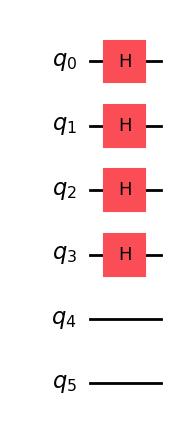

In [4]:
num_data_qubits = 4
num_ancilla_qubits = 2
qc_initial_state = initial_state(num_data_qubits, num_ancilla_qubits)
qc_initial_state.draw("mpl")

### Aufgabe 2: Einfaches Orakel für $n$ Qubits

Im nächsten Schritt implementieren wir ein einfaches Beispiel für ein **Grover-Orakel**.  
Unser Orakel soll genau dann „anschlagen“, wenn alle Daten-Qubits im Zustand $\ket{1}$ sind.  
Das bedeutet: Für diesen Basiszustand soll das Orakel das **Vorzeichen der Amplitude umkehren**, während alle anderen Zustände **unverändert** bleiben.  
Die Implementierung soll eine **beliebige Anzahl an Qubits** unterstützen!

#### Aufgabe 2.1: Implementierung mit einem mehrfach kontrollierten Z-Gatter

Ein solches Orakel lässt sich mithilfe eines **mehrfach kontrollierten Z-Gatters** realisieren:  
Das Z-Gatter wird nur dann angewendet, wenn *alle* Steuerqubits den Wert 1 haben.  
In dieser Implementierung sind keine zusätzlichen Ancilla-Qubits notwendig.

**Hinweis:**  
In Qiskit existiert kein direktes mehrfach kontrolliertes Z-Gatter.  
Wir können jedoch die Identität $Z = H X H$ nutzen, um das gewünschte Verhalten mit einem **mehrfach kontrollierten X-Gatter** (`mcx`) zu implementieren.  
Dazu wird vor und nach dem `mcx`-Gatter ein Hadamard-Gatter auf das Ziel-Qubit angewendet.

Das mehrfach kontrollierte X-Gatter kann so genutzt werden:

```python
quantum_circuit.mcx(liste_kontroll_qubits, ziel_qubit)
```

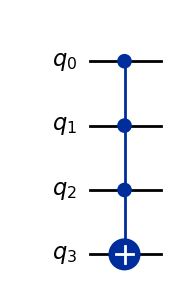

In [5]:
quantum_circuit = QuantumCircuit(4)
quantum_circuit.mcx([0, 1, 2], 3)
quantum_circuit.draw("mpl")

In [6]:
def oracle(num_data_qubits: int) -> QuantumCircuit:
    """ Implementation of the oracle function for the Grover algorithm that finds the |1...11> state
     
    Args:
        num_data_qubits (int): Number of data qubits  
        
    Returns:
        Quantum circuit of the oracle
    """

    # Implementation of the orakel with the controlled-Z gate implemented by HZH
    qc_orakel = QuantumCircuit(num_data_qubits)
    list_of_qubits = list(range(num_data_qubits))
    qc_orakel.h(num_data_qubits - 1)
    qc_orakel.mcx(list_of_qubits[:-1], num_data_qubits - 1)
    qc_orakel.h(num_data_qubits - 1)
    return qc_orakel

Testen Sie Ihre Implementierung mit folgendem Code:

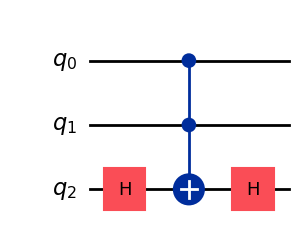

In [7]:
num_data_qubits = 3
qc_orakel = oracle(num_data_qubits)
qc_orakel.draw("mpl")

### Aufgabe 2.2: Orakel auf den gleichverteilten Zustand anwenden

Überprüfen Sie, ob das in **Aufgabe 2.1** implementierte Orakel auf den **gleichverteilten Anfangszustand** aus **Aufgabe 1** das erwartete Verhalten zeigt.  
Dazu verwenden wir **drei Daten-Qubits**.

Gehen Sie dabei wie folgt vor:

1. Erzeugen Sie einen **leeren Quantenschaltkreis** mit der Gesamtanzahl der benötigten Qubits.  
2. Erzeugen Sie den **Anfangszustand** mit Ihrer Funktion `initial_state(...)` und fügen Sie ihn mit der Funktion `compose` an den leeren Schaltkreis an.  
3. Erzeugen Sie anschließend das **Orakel** und fügen Sie es ebenfalls mit `compose` an.  
4. Analysieren Sie den resultierenden Quantenzustand mit der Hilfsfunktion:
   ```python
   print_grover_states(quantum_circuit, num_data_qubits)
   ```

**Hinweis:** Mit der folgenden Qiskit-Funktion kann ein zweiter Schaltkreis (``quantum_circuit2``) an einen bestehenden (``quantum_circuit1``) angehängt werden:

```python
quantum_circuit1.compose(quantum_circuit2, inplace=True)
```

In [8]:
num_data_qubits = 3
num_ancilla_qubits = 0
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)
qc_grover.compose(oracle(num_data_qubits), inplace=True)

print_grover_states(qc_grover, num_data_qubits)

Gefundene Basiszustände mit Amplituden ungleich Null:
000:  0.35 
001:  0.35 
010:  0.35 
011:  0.35 
100:  0.35 
101:  0.35 
110:  0.35 
111: -0.35 


### Aufgabe 2.3: Implementierung mit der Compute–Uncompute-Methode

In dieser Aufgabe soll das Orakel mithilfe der **Compute–Uncompute-Methode** implementiert werden.  
Dabei wird ein zusätzliches **Ancilla-Qubit** verwendet, das als Ziel für die Berechnung der Orakelfunktion dient.

Die Grundidee dieser Methode besteht darin, den gewünschten logischen Ausdruck (z. B. „alle Qubits = 1“) zunächst zu berechnen, das Ergebnis auf das **Ancilla-Qubit** zu schreiben, anschließend mit einem Z-Gatter das Vorzeichen des Zielzustands zu invertieren und danach den Berechnungsschritt wieder rückgängig zu machen (*Uncompute*).  
So bleibt der ursprüngliche Quantenzustand der Daten-Qubits unverändert, während das Ancilla-Qubit die Vorzeichenänderung realisiert.  
Nach der Orakel-Berechnung muss sich das Ancilla-Qubit wieder im ursprünglichen Zustand $\ket{0}$ befinden.

Die Abfrage, ob alle Daten-Qubits den Wert 1 haben, lässt sich mit dem `mcx`-Gatter implementieren.


In [9]:
def oracle_ancilla(num_data_qubits:int) -> QuantumCircuit:
    """ Implementation of the oracle function for the Grover algorithm that finds the |1...11> state
    and uses one ancilla qubit
     
    Args:
        num_data_qubits (int): Number of data qubits  
        
    Returns:
        Quantum circuit of the oracle with additional ancilla qubits
        
    """ 

    # Implementation with one additional ancilla qubit
    qc_orakel = QuantumCircuit(num_data_qubits + 1)
    list_of_qubits = list(range(num_data_qubits))
    qc_orakel.mcx(list_of_qubits, num_data_qubits)
    qc_orakel.z(num_data_qubits)
    qc_orakel.mcx(list_of_qubits, num_data_qubits)
    return qc_orakel

Testen Sie ihre Implementierung mit folgendem Code:

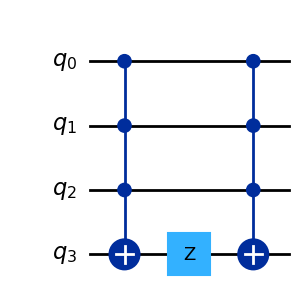

In [10]:
num_data_qubits = 3
num_ancilla_qubits = 1
qc_orakel = oracle_ancilla(num_data_qubits)
qc_orakel.draw("mpl")

### Aufgabe 2.4: Anwendung des Compute–Uncompute-Orakels

Wenden Sie das in **Aufgabe 2.3** implementierte Orakel auf den **gleichverteilten Zustand** aus **Aufgabe 1** an.  
Verwenden Sie dabei erneut **drei Daten-Qubits**.

Gehen Sie analog zu **Aufgabe 2.2** vor.  
Beachten Sie, dass nun ein zusätzliches **Ancilla-Qubit** verwendet wird.

In [11]:
num_data_qubits = 3
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)
qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)

print_grover_states(qc_grover, 3)

Gefundene Basiszustände mit Amplituden ungleich Null:
000 0:  0.35
001 0:  0.35
010 0:  0.35
011 0:  0.35
100 0:  0.35
101 0:  0.35
110 0:  0.35
111 0: -0.35


### Aufgabe 3: Amplitudenverstärkung

In **Aufgabe 3** implementieren wir den dritten zentralen Baustein des Grover-Algorithmus: die **Amplitudenverstärkung**.  

Ziel dieses Schritts ist es, die durch das Orakel markierten Zustände weiter zu **verstärken**, während die Amplituden der übrigen Zustände abgeschwächt werden.  
Dazu konstruieren wir einen Quantenschaltkreis, der eine **Spiegelung der Amplituden am gleichverteilten Zustand** realisiert und so die Erfolgschance des Algorithmus erhöht.

Den entsprechenden Schaltkreis finden Sie in den **Vorlesungsfolien**.

**Aufgabe 3.1:**  
Implementieren Sie die Amplitudenverstärkung für eine beliebige Anzahl von Qubits.

In [12]:
def amplitude_amplification(num_data_qubits: int, num_ancilla_qubits: int) -> QuantumCircuit:
    """ Implementation of the amplitude amplification for the Grover algorithm
     
    Args:
        num_data_qubits (int): Number of data qubits on which the amplitude amplification is applied
        num_ancilla_qubits (int): Number of ancilla qubits that are untouched by the amplitude amplification
        
    Returns:
        Quantum circuit of the amplitude amplification
    """ 
    qc_amplification = QuantumCircuit(num_data_qubits + num_ancilla_qubits)
    list_of_qubits = list(range(num_data_qubits))
    qc_amplification.h(list_of_qubits)
    qc_amplification.x(list_of_qubits)
    qc_amplification.h(num_data_qubits - 1)
    qc_amplification.mcx(list_of_qubits[:-1], num_data_qubits - 1)
    qc_amplification.h(num_data_qubits - 1)
    qc_amplification.x(list_of_qubits)
    qc_amplification.h(list_of_qubits)

    qc_amplification.rz(2 * np.pi, 0)

    return qc_amplification

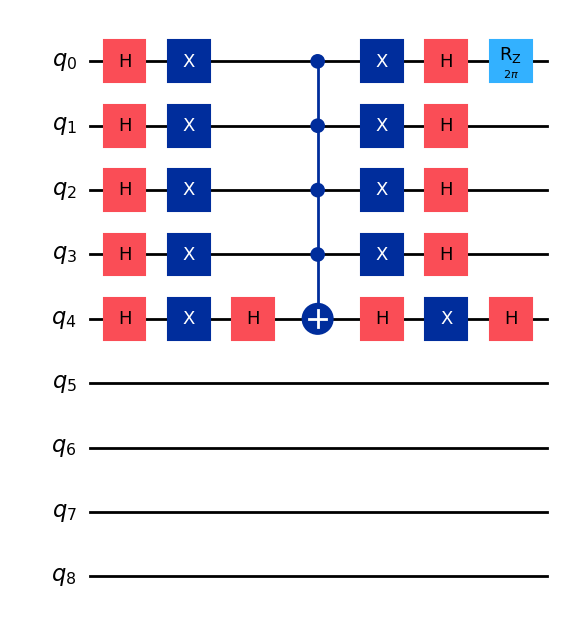

In [13]:
qc = amplitude_amplification(5, 4)

qc.draw('mpl')

**Aufgabe 3.2:**  
Was passiert, wenn wir die Amplitudenverstärkung auf den initialen gleichverteilten Zustand anwenden?  
Gehen Sie dabei wie in **Aufgabe 2.2** und **Aufgabe 2.4** vor.

In [14]:
num_data_qubits = 4
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)
qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 0:  0.25
0001 0:  0.25
0010 0:  0.25
0011 0:  0.25
0100 0:  0.25
0101 0:  0.25
0110 0:  0.25
0111 0:  0.25
1000 0:  0.25
1001 0:  0.25
1010 0:  0.25
1011 0:  0.25
1100 0:  0.25
1101 0:  0.25
1110 0:  0.25
1111 0:  0.25


**Beobachtung:** Die Anwendung der Amplitudenverstärkung auf den gleichverteilten Zustand hat keine Auswirkung!

### Aufgabe 4: Zusammensetzen der Bausteine im Grover-Algorithmus

Im letzten Schritt setzen wir die Bausteine aus den vorherigen Aufgaben zu dem **Grover-Algorithmus** zusammen und analysieren seine Funktionsweise. 

**Aufgabe 4.1:**  
Konstruieren Sie den Grover-Algorithmus mit **einem Grover-Schritt** für das Orakel aus **Aufgabe 2.3** unter Verwendung von **vier Daten-Qubits** und **einem Ancilla-Qubit**.  
Nutzen Sie dafür erneut die Funktion `compose`.  
Analysieren Sie anschließend den resultierenden Quantenzustand mit der Hilfsfunktion `print_grover_states`.  

Was beobachten Sie nach einer Anwendung des Grover-Schritts?

In [15]:
num_data_qubits = 4
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)

qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)
qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 0:  0.19
0001 0:  0.19
0010 0:  0.19
0011 0:  0.19
0100 0:  0.19
0101 0:  0.19
0110 0:  0.19
0111 0:  0.19
1000 0:  0.19
1001 0:  0.19
1010 0:  0.19
1011 0:  0.19
1100 0:  0.19
1101 0:  0.19
1110 0:  0.19
1111 0:  0.69


**Beobachtung:** Die Amplitude des gesuchten Zustands $\ket{1111}$ wird vergrößert, alle anderen verringert. 

**Aufgabe 4.2:**  
Untersuchen Sie nun das Ergebnis für **zwei**, **drei** und **vier** Wiederholungen des Grover-Schritts.  
Was beobachten Sie dabei hinsichtlich der **Amplituden der Quantenzustände**?

In [16]:
num_data_qubits = 4
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits

qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

for i in range(2):
    qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
    qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 0:  0.08
0001 0:  0.08
0010 0:  0.08
0011 0:  0.08
0100 0:  0.08
0101 0:  0.08
0110 0:  0.08
0111 0:  0.08
1000 0:  0.08
1001 0:  0.08
1010 0:  0.08
1011 0:  0.08
1100 0:  0.08
1101 0:  0.08
1110 0:  0.08
1111 0:  0.95


In [17]:
num_data_qubits = 4
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits

qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

for i in range(3):
    qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
    qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 0: -0.05
0001 0: -0.05
0010 0: -0.05
0011 0: -0.05
0100 0: -0.05
0101 0: -0.05
0110 0: -0.05
0111 0: -0.05
1000 0: -0.05
1001 0: -0.05
1010 0: -0.05
1011 0: -0.05
1100 0: -0.05
1101 0: -0.05
1110 0: -0.05
1111 0:  0.98


In [18]:
num_data_qubits = 4
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits

qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

for i in range(4):
    qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
    qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 0: -0.17
0001 0: -0.17
0010 0: -0.17
0011 0: -0.17
0100 0: -0.17
0101 0: -0.17
0110 0: -0.17
0111 0: -0.17
1000 0: -0.17
1001 0: -0.17
1010 0: -0.17
1011 0: -0.17
1100 0: -0.17
1101 0: -0.17
1110 0: -0.17
1111 0:  0.76


**Beobachtung:** Die Amplitude für den Zielzustand $\ket{1111}$ nimmt nach und nach zu. Ab vier Wiederholungen sinkt jedoch die Wahrscheinlichkeit wieder! Hier wurden zu viele Grover Schritte durchgeführt!

**Aufgabe 4.3:**  
Erhöhen Sie nun die Anzahl der Qubits von **4** auf **8**.  
Wie viele Iterationen sind notwendig, um eine Wahrscheinlichkeit von über **95 %** zu erreichen?  

Da in diesem Fall sehr viele Quantenzustände vorliegen, kann in der Routine `print_grover_states` ein **Cutoff** festgelegt werden, der bestimmt, **ab welcher Amplitude** Zustände ausgegeben werden:  

```python
print_grover_states(qc_grover, 8, cutoff=0.1)
```

**Achtung:** Wahrscheinlichkeiten von mehr als 95% entsprechen einer Amplitude von mindestens $\sqrt{0.95} = 0.975$ sein

In [19]:
num_data_qubits = 8
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)

qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

num_repeat = 11

for i in range(num_repeat):
    qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
    qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

print_grover_states(qc_grover, 8, cutoff=0.1)

Gefundene Basiszustände mit Amplituden größer als 0.1:
11111111 0:  0.99


**Beobachtung:** Nach 11 Wiederholungen ist die Wahrscheinlichkeit größer als 95% (Sie liegt bei über 98%)

### Aufgabe 5: Grover mit Messungen

Im letzten Schritt erweitern wir unseren Grover-Algorithmus um **Messungen**, um die Lösung mit hoher Wahrscheinlichkeit zu erhalten.  

Fügen Sie dazu **Messungen für alle Qubits** hinzu und führen Sie die Messungen durch, um die **Wahrscheinlichkeitsverteilung der Messergebnisse** zu analysieren.  

**Hinweis 1:**  In Qiskit können Sie alle Qubits einfach messen, indem Sie die folgende Funktion verwenden:
```python
quantum_circuit.measure_all()
```

Dabei ist keine explizite Initialisierung klassischer Bits notwendig, da Qiskit diese automatisch hinzufügt.
Möchten Sie stattdessen die Qiskit-Funktion ``quantum_circuit.measure(index_qubit, index_bit)`` benutzen, z.B. um nur die Daten-Qubits zu messen,
müssen Sie den Quantenschaltkreis zuvor mit der passenden Anzahl an klassischen Bits initialisieren: `QuantumCircuit(num_qubits, num_bits)`

**Hinweis 2:**
Wie bereits in Praktikum 3 können Sie das Messen in Qiskit mit der folgenden Hilfsfunktion simulieren:
```python
sample_from_circuit(quantum_circuit, num_shots=100)
```

In [20]:
from qc_lecture_tools.sampling import sample_from_circuit, sample_from_circuit_hardware

quantum_circuit = QuantumCircuit(2)
quantum_circuit.h([0, 1])
quantum_circuit.measure_all()
sample_from_circuit(quantum_circuit, num_shots=100)

{'10': 32, '00': 23, '11': 24, '01': 21}

**Aufgabe 5.1:**  
Nutzen Sie die Implementierung aus **Aufgabe 4.3** mit **8 Daten-Qubits** und führen Sie damit eine Messung durch.  
Messen Sie zunächst nur mit **10 Shots**.  

Untersuchen Sie, wie sich die Anzahl der Grover-Schritte auf die gemessenen Zustände auswirkt.  
Bei wie vielen Grover-Schritten würden Sie dem Ergebnis vertrauen?

In [21]:
num_data_qubits = 8
num_ancilla_qubits = 1
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_data_qubits + num_ancilla_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

num_repeat = 10

for i in range(num_repeat):
    qc_grover.compose(oracle_ancilla(num_data_qubits), inplace=True)
    qc_grover.compose(amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True)

qc_grover.measure_all()

sample_from_circuit(qc_grover, num_shots=10)

{'001100000': 1, '111111110': 9}

**Aufgabe 5.2:**  
Führen Sie nun das Ganze mit einer **simulierten Quantenhardware** durch.  
Qiskit bietet die Möglichkeit, **Fehlermodelle** ihrer aktuellen und früheren Hardware in der Simulation zu berücksichtigen.  

Mit der folgenden Funktion können Sie eine Simulation unter Einbezug eines Hardware-Fehlermodells durchführen:

```python
sample_from_circuit_hardware(quantum_circuit, num_shots=100)
```

Führen Sie mehrere Simulationen mit einem Hardware-Fehlermodell des aktuellen Quantencomputers ``ibm_torino`` durch.
Untersuchen Sie, wie sich das Ergebnis aus Aufgabe 5.1 verändert, wenn Sie es auf der simulierten Hardware ausführen.

**Hinweis:** Die Simulation mit Hardwarefehlern dauert deutlich länger als zuvor.
Wundern Sie sich daher nicht, wenn die Berechnung einige Zeit in Anspruch nimmt.

In [22]:
sample_from_circuit_hardware(qc_grover, num_shots=10)

{'010110111': 1,
 '111101110': 1,
 '000011100': 1,
 '111111110': 6,
 '111111111': 1}

### Bonusaufgabe: Sudoku Grover

Als Extraaufgabe können Sie nun das Lösen des Sudokus aus dem vorherigen Praktikum mit dem Grover-Algorithmus implementieren.  
Gegeben ist das folgende 2×2-Sudoku (die Reihenfolge der Zahlen spielt keine Rolle):

| ?   | 4   |
|-----|-----|
| **2** | **?** |

Eine valide Lösung ist gegeben, wenn jede Zahl nur einmal in den freien Plätzen dieses Kastens vorkommt. Weitere Kästen vernachlässigen wir, da sonst schnell zu viele Qubits notwendig würden.

Wir stellen die Zahlen mit zwei Bits dar:

- 1 &rarr; 00
- 2 &rarr; 01
- 3 &rarr; 10
- 4 &rarr; 11

Da zwei Zahlen fehlen, werden **vier Daten-Qubits** benötigt.  

Das passende Orakel ist in der Funktion `oracle_sudoku` bereitgestellt. Es benötigt **4 Daten-Qubits** und **8 Ancilla-Qubits**, also insgesamt **12 Qubits**.  

Falls Sie eine eigene Implementierung davon haben, können Sie auch gerne diese verwenden.  
Im letzten Praktikum haben wir dafür nur den **Compute-Schritt** implementiert. Sie müssen also noch ein **Z-Gatter** auf das finale Qubit anwenden, um das Vorzeichen zu ändern. Anschließend fehlt noch der **Uncompute-Schritt**, um die Ancilla-Qubits wieder in den Zustand $\ket{0}$ zurückzusetzen.  

Am einfachsten nutzen Sie dafür die Qiskit-Funktion `quantum_circuit.inverse()`, welche Ihnen die Inverse des Quantenschaltkreises zurückgibt.  
Mit der `compose`-Funktion können Sie daraus dann das vollständige Orakel bauen.


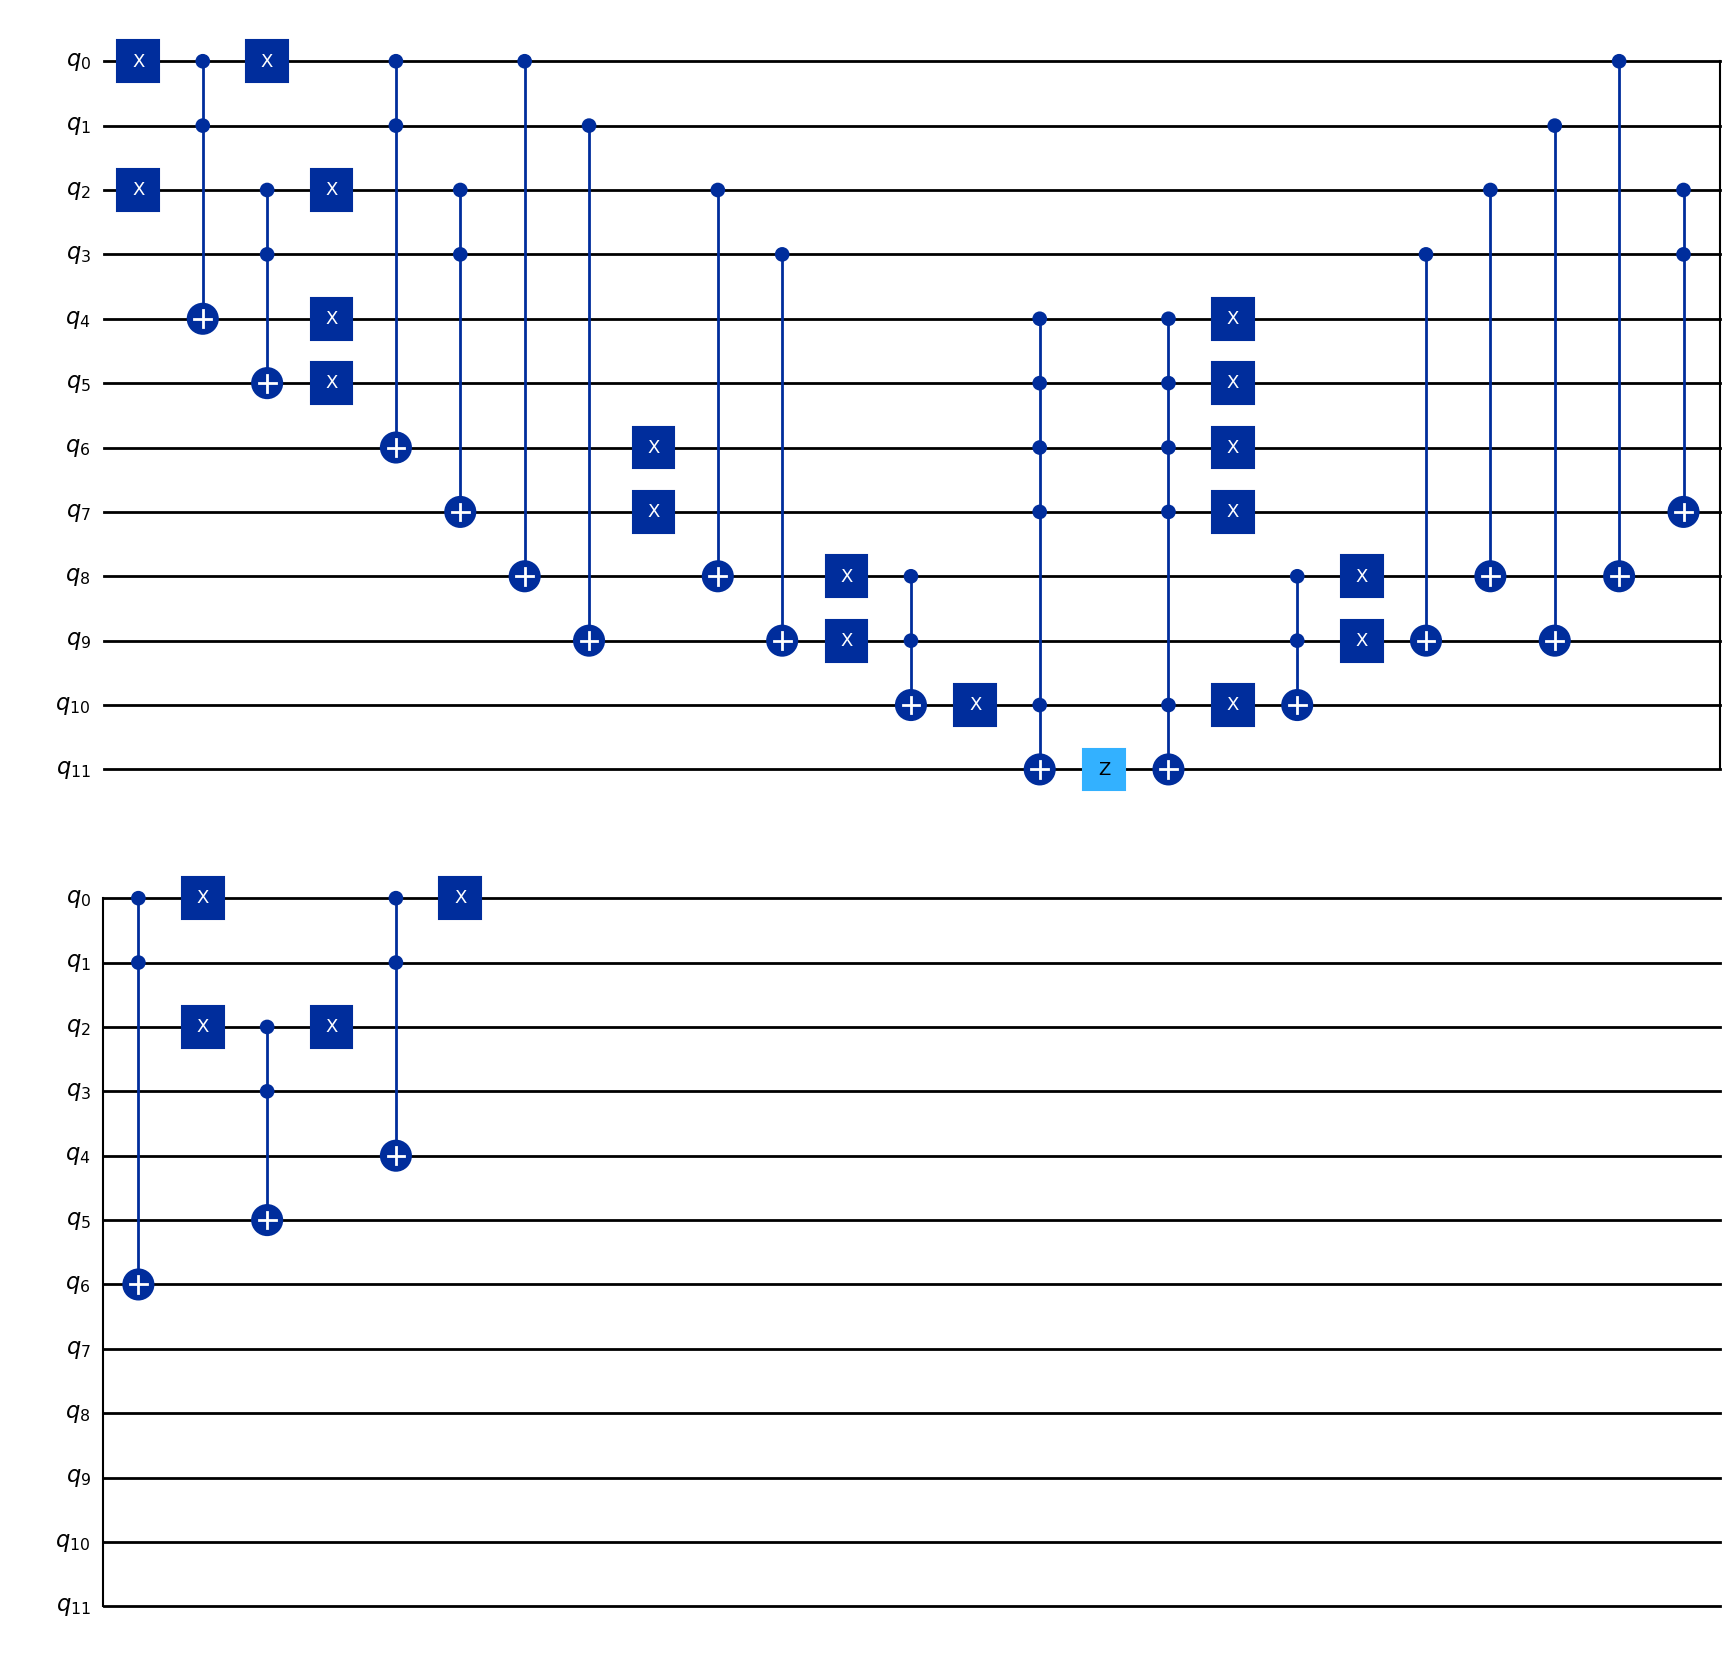

In [23]:
from qc_lecture_tools.grover import oracle_sudoku

orakel_circuit = oracle_sudoku()
orakel_circuit.draw("mpl")

In [24]:
from qc_lecture_tools.grover import oracle_sudoku

num_data_qubits = 4
num_ancilla_qubits = 8
num_qubits = num_data_qubits + num_ancilla_qubits
qc_grover = QuantumCircuit(num_qubits)
qc_grover.compose(initial_state(num_data_qubits, num_ancilla_qubits), inplace=True)

num_repeat = 2

for i in range(num_repeat):
    qc_grover.compose(oracle_sudoku(), inplace=True)
    qc_grover.compose(
        amplitude_amplification(num_data_qubits, num_ancilla_qubits), inplace=True
    )

print_grover_states(qc_grover, 4)

Gefundene Basiszustände mit Amplituden ungleich Null:
0000 00000000: -0.06
0001 00000000: -0.06
0010 00000000:  0.69
0011 00000000: -0.06
0100 00000000: -0.06
0101 00000000: -0.06
0110 00000000: -0.06
0111 00000000: -0.06
1000 00000000:  0.69
1001 00000000: -0.06
1010 00000000: -0.06
1011 00000000: -0.06
1100 00000000: -0.06
1101 00000000: -0.06
1110 00000000: -0.06
1111 00000000: -0.06
